# DBSCAN (Density-based Spatial Clustering of Application with Noise)

#### : 밀도기반 클러스터링은 k-means나 계층 클러스터의 경우  군집간의 거리를 이용해서 
#### : 클러스터링을 하는 방법이었지만,밀도가 기반은 점이 세밀하게 몰려 있어서  밀도가 높은 부분을 클러스터링하는 방식
#### (어느 점을 기준으로 반경(eps) x내에 점이  n개 이상 있으며 하나의 군집으로 인식하는 방식)

#### cmd (관리자 권한으로 실행)
#### : python -m pip install --upgrade pip

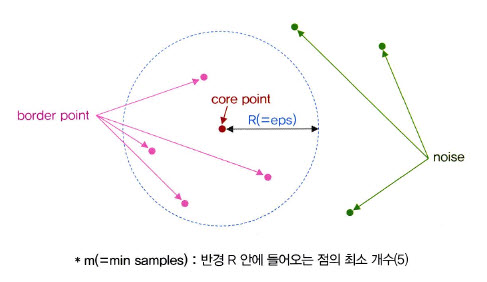

In [1]:
from IPython.display import Image
Image("datasets/dbscan01.jpg")

In [2]:
# 지리 데이터 시각화 라이브러리: folium
!pip install folium

In [3]:
!pip show folium

Name: folium
Version: 0.10.1
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, jinja2, requests, branca
Required-by: 


In [4]:
import pandas as pd
import folium

### Step1 : 데이터준비 & 기본설정

In [5]:
#서울 시내 중학교 진학률 데이터셋(https://www.schoolinfo.go.kr/ng/pnnggo_a01_l2.do)
file_path='./datasets/2016_middle_shcool_graduates_report.xlsx'
df=pd.read_excel(file_path, header=0)

In [6]:
#IPython Console 옵션설정하기
pd.set_option('display.width',None)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',10)
pd.set_option('display.max_colwidth',20)
pd.set_option('display.unicode.east_asian_width',True) #유니코드 사용 너비 조정

In [7]:
# 열 이름 배열 출력
df.columns.values

array(['지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고', '특성화고',
       '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업',
       '미상', '위도', '경도'], dtype=object)

### Step 2:: 데이터 탐색

In [8]:
df.head()

,지역,학교명,코드,유형,주야,...,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,...,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,...,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,...,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,...,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,...,0.010,0,0.000,37.510750,127.008900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
지역        415 non-null object
학교명       415 non-null object
코드        415 non-null int64
유형        415 non-null object
주야        415 non-null object
남학생수      415 non-null int64
여학생수      415 non-null int64
일반고       415 non-null float64
특성화고      415 non-null float64
과학고       415 non-null float64
외고_국제고    415 non-null float64
예고_체고     415 non-null float64
마이스터고     415 non-null float64
자사고       415 non-null float64
자공고       415 non-null float64
기타진학      415 non-null float64
취업        415 non-null int64
미상        415 non-null float64
위도        415 non-null float64
경도        415 non-null float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB


In [10]:
df.describe()

,코드,남학생수,여학생수,일반고,특성화고,...,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.0,415.000000,415.000000,415.000000
mean,3.197590,126.532530,116.173494,0.623080,0.149684,...,0.069571,0.0,0.001670,37.491969,127.032792
std,0.804272,79.217906,76.833082,0.211093,0.102977,...,0.235630,0.0,0.003697,0.348926,0.265245
min,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,34.979940,126.639561
25%,3.000000,80.000000,71.500000,0.566500,0.065500,...,0.000000,0.0,0.000000,37.501934,126.921758
50%,3.000000,129.000000,118.000000,0.681000,0.149000,...,0.007000,0.0,0.000000,37.547702,127.013579
75%,3.000000,177.500000,161.500000,0.758000,0.224500,...,0.015000,0.0,0.003000,37.590670,127.071265
max,9.000000,337.000000,422.000000,0.908000,0.477000,...,1.000000,0.0,0.036000,37.694777,129.106974


In [11]:
#지도에 위치 표시
# 지도형식(tiles='Stamen Terrain'): 'Stamen Toner', 'Mapbox Bright','Mapbox Control room tiles'
mschool_map=folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

In [12]:
#중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    #마커: 특정위치를 표시하는 표식
    folium.CircleMarker([lat, lng],
                                   radius=5, #원의 반지름
                                  color='brown', #원의 둘레 색상
                                  fill=True,
                                  fill_color='coral', #원을 채우는 색
                                  fill_opacity=0.7, #투명도
                                  popup=name # 마커를 클릭했을때 나나타는 정보
    ).add_to(mschool_map)

In [13]:
#지도를 html파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

### Setp3 : Data Preprocessing(전처리)

In [14]:
#one-hot-encoding(dummy variable)
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder() # label encoder 생성
onehot_encoder=preprocessing.OneHotEncoder() #one hot encoder 생성

In [16]:
#모델이 인식할수 있는 문자열 데이터를 더미변수로 변환
onehot_location= label_encoder.fit_transform(df['지역'])
onehot_code= label_encoder.fit_transform(df['코드'])
onehot_type= label_encoder.fit_transform(df['유형'])
onehot_day= label_encoder.fit_transform(df['주야'])

In [17]:
#더미변수를 DataFrame에 추가
df['location']=onehot_location
df['code']=onehot_code
df['type']=onehot_type
df['day']=onehot_day

In [18]:
df.head()

,지역,학교명,코드,유형,주야,...,경도,location,code,type,day
0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,...,127.038909,16,0,1,0
1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,...,127.003857,22,0,1,0
2,강남구,개원중학교,3,공립,주간,...,127.071744,0,0,0,0
3,강남구,개포중학교,3,공립,주간,...,127.062201,0,0,0,0
4,서초구,경원중학교,3,공립,주간,...,127.008900,14,0,0,0


### Step4:: DBSCAN 군집모델-sklearn 사용

In [19]:
#sklearn에 있는 군집모델을 가져오기
from sklearn import cluster

In [20]:
# 분석에 사용할 속성 선택(과학고, 외고, 자사고 진학율)
columns_list=[9,10,13]
X=df.iloc[:, columns_list]
X[:5]

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282


In [21]:
# 설명변수 정규화
X=preprocessing.StandardScaler().fit(X).transform(X)

In [22]:
# DBSCAN 모델 객체 생성
dbm=cluster.DBSCAN(eps=0.2, min_samples=5)

In [23]:
# model fitting
dbm.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [24]:
#noise : -1
# cluster: 0,1,2,3
cluster_label=dbm.labels_
cluster_label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
        0,  3, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  1,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  2,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  1,
       -1, -1,  0,  2,  0, -1, -1,  1, -1, -1, -1,  0,  0,  0, -1, -1,  0,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1,
       -1,  0, -1, -1, -1,  1,  0,  3,  1, -1,  0,  0, -1,  0, -1, -1,  0,
        0,  2, -1, -1,  3,  0,  0, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [25]:
# 예측한 결과를 Data Frame에 추가
df['Cluster']= cluster_label
df.head()

,지역,학교명,코드,유형,주야,...,location,code,type,day,Cluster
0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,...,16,0,1,0,-1
1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,...,22,0,1,0,-1
2,강남구,개원중학교,3,공립,주간,...,0,0,0,0,-1
3,강남구,개포중학교,3,공립,주간,...,0,0,0,0,-1
4,서초구,경원중학교,3,공립,주간,...,14,0,0,0,-1


In [26]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용출력(첫5줄만 출력)
grouped_cols= [0,1,3]+columns_list
grouped=df.groupby('Cluster')
for key,group in grouped:
    print('* key:', key)
    print('* number: ', len(group))
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key: -1
* number:  255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key: 0
* number:  102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key: 1
* number:  45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구      개봉

In [27]:
#cluster 0: 외고(국제고)&자사고 합격율은 높지만 과학고 합격자가 없는 그룹
#cluster 1:  자사고 합격자만 존재하는 그룹
#cluster 2:  자사고 합격율이 매우 높으면서 과학고와 외고(국제고)합격자도 일부 존재하는 그룹

# 그래프 시각화
colors={-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple',
            5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magneta',10:'cyan'
       }
cluster_map=folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity=0.7,
                        popup=name
    ).add_to(cluster_map)

In [28]:
#지도를 html파일로 저장하기
cluster_map.save('./datasets/seoul_mschool_cluster2.html')

In [30]:
#X3 데이터에 대해서  위의 과정을 반복((과학고, 외고_국제고))
#DBSCAN 모델에 입력하는 속성을 2개로 줄여서 예측하기
#이것은 Noise가 61개 줄어들고,0~6 z클러스터로 구분
columns_list3=[9,10]
X3=df.iloc[:, columns_list3]

In [31]:
X3[:5]

,과학고,외고_국제고
0,0.018,0.007
1,0.000,0.035
2,0.009,0.012
3,0.013,0.013
4,0.007,0.010


In [32]:
X3=preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3=cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)
df['Cluster3']=dbm3.labels_

In [34]:
grouped3_cols=[0,1,3]+columns_list3
grouped3=df.groupby('Cluster3')
for key, group in grouped3:
    print('* key : ', key)
    print('* number : ',len(group))
    print(group.iloc[:, grouped3_cols].head())
    print('\n')
    
cluster3_map=folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity=0.7,
                        popup=name
    ).add_to(cluster3_map)

* key :  -1
* number :  61
     지역                             학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사범대학부설중학교.....  국립   0.018        0.007
3  강남구           개포중학교                공립   0.013        0.013
6  강남구         압구정중학교                공립   0.015        0.036
7  강남구  단국대학교사범대학부속중학교.....  사립   0.032        0.005
8  강남구           대명중학교                공립   0.013        0.029


* key :  0
* number :  160
      지역                               학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사범대학부설여자중학교...  국립     0.0        0.035
13  서초구       동덕여자중학교                  사립     0.0        0.022
22  강남구           수서중학교                  공립     0.0        0.019
28  서초구           언남중학교                  공립     0.0        0.015
29  강남구           언북중학교                  공립     0.0        0.007


* key :  1
* number :  111
      지역      학교명  유형  과학고  외고_국제고
2   강남구  개원중학교  공립   0.009        0.012
4   서초구  경원중학교  공립   0.007        0.010
5   강남구  구룡중학교  공립   0.007        0.007
11  강남구  대치중학교  공립   0.007        0.024


In [35]:
cluster3_map.save('./seoul_mschool_cluster3.html')

In [36]:
columns_list2=[9,10,13,22]
X2=df.iloc[:, columns_list2]
X2[:5]

,과학고,외고_국제고,자사고,type
0,0.018,0.007,0.227,1
1,0.000,0.035,0.043,1
2,0.009,0.012,0.090,0
3,0.013,0.013,0.065,0
4,0.007,0.010,0.282,0


In [38]:
X2=preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2=cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)
df['Cluster2']=dbm2.labels_

grouped2_cols=[0,1,3]+columns_list2
grouped2=df.groupby('Cluster2')
for key, group in grouped2:
    print('* key : ', key)
    print('* number : ',len(group))
    print(group.iloc[:, grouped2_cols].head())
    print('\n')
    
cluster2_map=folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color=colors[clus],
                        fill=True,
                        fill_color=colors[clus],
                        fill_opacity=0.7,
                        popup=name
    ).add_to(cluster2_map)

* key :  -1
* number :  281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  type  
0   0.227     1  
1   0.043     1  
2   0.090     0  
3   0.065     0  
4   0.282     0  


* key :  0
* number :  8
       지역      학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교  공립     0.0        0.019   0.044     0
43   송파구  거원중학교  공립     0.0        0.021   0.054     0
51   송파구  방이중학교  공립     0.0        0.021   0.068     0
93   강서구  방원중학교  공립     0.0        0.019   0.057     0
164  중랑구  원묵중학교  공립     0.0        0.020   0.062     0


* key :  1
* number :  59
      지역      학교명  유형  과학고  외고_국제고  자사고  type
28  서초구  언남중학교  공립     0.0        0.015   0.050     0
47  강동구  둔촌중